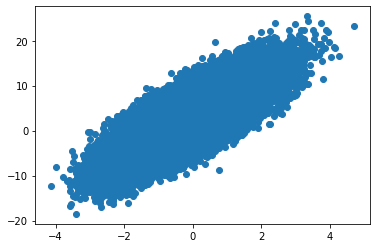

In [2]:
import numpy as np
import matplotlib.pyplot as plt

2
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1,1)
y = 4.*x + 3. + np.random.normal(0, 3, size=m)

plt.scatter(x, y)
plt.show()


In [3]:
import os
import sys
sys.path.append('/mycode/code-basic-machine-learning/06-Gradient-Descent/6.7-sgd-lr-sklearn/')

from myML.LinearRegression import LinearRegression

lr = LinearRegression()
lr.fit_bgd(X, y)
print(lr.intercept_)
print(lr.coef_)

3.0152871639860797
[4.00837916]


In [4]:
lr = LinearRegression()
lr.fit_sgd(X, y)
print(lr.intercept_)
print(lr.coef_)



3.019739633719469
[4.01961477]


In [8]:
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)


from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

lr = LinearRegression()
%time lr.fit_sgd(X_train_standard, y_train)
print(lr.intercept_)
print(lr.coef_)

lr.score(X_test_standard, y_test)

CPU times: user 9.27 ms, sys: 39 µs, total: 9.31 ms
Wall time: 9.34 ms
21.510847798428696
[-0.83038689  0.84178015 -0.81784499 -0.00785853 -1.07093548  2.2991353
 -0.69561243 -2.15727823  1.38263175 -1.08011134 -1.76743873  0.76779015
 -2.76006874]


0.7960244000798473

In [9]:
%time lr.fit_sgd(X_train_standard, y_train, n_iter=50)
lr.score(X_test_standard, y_test)



CPU times: user 84.3 ms, sys: 2.71 ms, total: 87 ms
Wall time: 85.2 ms


0.801137283032914

In [11]:
%time lr.fit_sgd(X_train_standard, y_train, n_iter=100)
lr.score(X_test_standard, y_test)


CPU times: user 160 ms, sys: 1.95 ms, total: 162 ms
Wall time: 161 ms


0.8006096779982614

In [13]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
%time sgd.fit(X_train_standard, y_train)
sgd.score(X_test_standard, y_test)


CPU times: user 1.67 ms, sys: 548 µs, total: 2.22 ms
Wall time: 1.43 ms


0.7953240238981206

In [20]:
sgd = SGDRegressor(max_iter = 5000)
%time sgd.fit(X_train_standard, y_train)
sgd.score(X_test_standard, y_test)


CPU times: user 1.47 ms, sys: 587 µs, total: 2.05 ms
Wall time: 1.19 ms


0.7928272196990575